# COVID-19 Xray Dataset (Train & Test Sets)

In [1]:
link= "khoongweihao/covid19-xray-dataset-train-test-sets"

## Download Data

In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
import kagglehub


path = kagglehub.dataset_download(link)

print("Path to dataset files:", path)

100%|██████████| 84.3M/84.3M [00:05<00:00, 16.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/versions/1


In [4]:
path

'/root/.cache/kagglehub/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/versions/1'

In [5]:
print(os.listdir(path))

['xray_dataset_covid19']


In [6]:
path=os.path.join(path,'xray_dataset_covid19')

In [7]:
print(os.listdir(path))

['train', 'test']


train
-->NORMAL
---->IM-0015-0001.jpeg


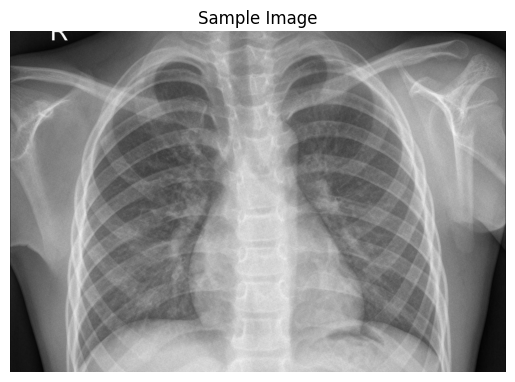

-->PNEUMONIA
---->85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg


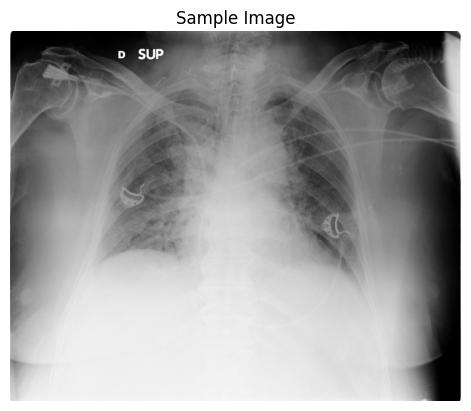

test
-->NORMAL
---->NORMAL2-IM-0092-0001.jpeg


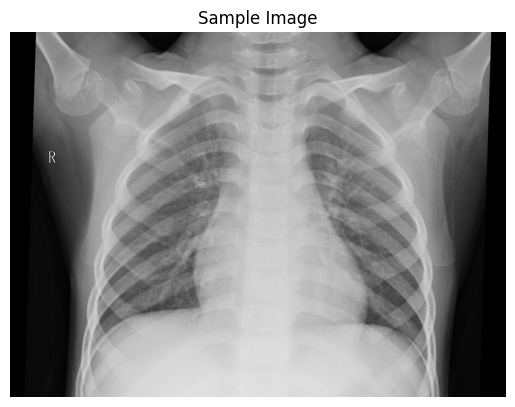

-->PNEUMONIA
---->SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg


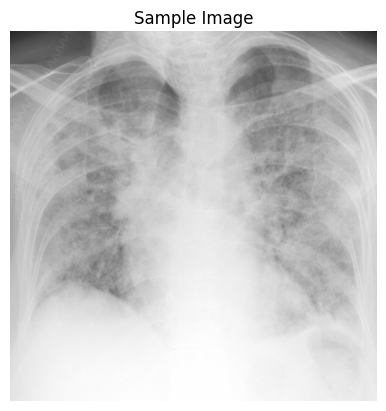

In [8]:
import cv2 as cv
sizes = set()
for fol in os.listdir(path):
  print(fol)

  for fol2 in os.listdir(os.path.join(path,fol)):
    print("-->"+fol2)
    for img in os.listdir(os.path.join(path,fol,fol2)):
      print("---->"+img)
      img=os.path.join(path,fol,fol2,img)
      img=cv.imread(img)
      height, width = img.shape[:2]
      sizes.add((height, width))
      img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
      plt.imshow(img)
      plt.axis('off')
      plt.title('Sample Image')
      plt.show()
      break



In [9]:
for size in sorted(sizes):
        print(f"Size {size[0]}x{size[1]}")

Size 1238x1803
Size 1472x1799
Size 1576x2143
Size 1800x1787


# Model

## Load Data

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator as dgen
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
train_path=os.path.join(path,"train")
test_path=os.path.join(path,"test")
train_path,test_path

('/root/.cache/kagglehub/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/versions/1/xray_dataset_covid19/train',
 '/root/.cache/kagglehub/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/versions/1/xray_dataset_covid19/test')

In [12]:
h,w=224,224
b_size=64

train_datagen=dgen(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(h, w),
    batch_size=b_size,
    class_mode='binary',
    color_mode="grayscale"
)


test_datagen=dgen(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(h, w),
    batch_size=b_size,
    class_mode='binary',
    color_mode="grayscale",
    shuffle=False
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


## Model Arch

In [23]:
model= tf.keras.Sequential(
    [
      Conv2D(32, (3, 3), activation='relu', input_shape=(w, h, 1)),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Dropout(0.5),

      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(256, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Dropout(0.5),

      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),


      Dense(1, activation='sigmoid')
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,106,689 (19.48 MB)

 Trainable params: 5,106,689 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
earlystop=EarlyStopping(patience=6)

callbacks = [earlystop]

In [26]:
epochs = 10
history = model.fit(
    train_generator,
    epochs = epochs,
    batch_size = b_size,
    validation_data = test_generator,
    callbacks = callbacks
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5291 - loss: 0.7357 - val_accuracy: 0.5500 - val_loss: 0.6793
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5254 - loss: 0.6901 - val_accuracy: 0.5000 - val_loss: 0.6901
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4988 - loss: 0.6960 - val_accuracy: 0.5250 - val_loss: 0.6906
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7462 - loss: 0.6837 - val_accuracy: 0.5500 - val_loss: 0.6874
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 804ms/step - accuracy: 0.6583 - loss: 0.6728 - val_accuracy: 0.5000 - val_loss: 0.6749
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5866 - loss: 0.6262 - val_accuracy: 0.8250 - val_loss: 0.6399
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7214 - loss: 0.5921 - val_accuracy: 0.9750 - val_loss: 0.5375
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 782ms/step - accuracy: 0.7878 - loss: 0.4855 - val_accuracy: 0.9500 - val_loss: 0.3792
Epoch 9/1

In [27]:
test_loss, test_acc = model.evaluate(test_generator)

print(f'Loss Function {test_loss}%')
print(f'Accuracy {test_acc}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step - accuracy: 0.9750 - loss: 0.2178
Loss Function 0.21779212355613708%
Accuracy 0.9750000238418579%


In [ ]:
# prompt: in multi line comment write a summary about what is the project i did and what is the resauls and how can this project help us

"""
This project focuses on building a Convolutional Neural Network (CNN) to classify chest X-ray images as either showing signs of COVID-19 or not.

Project Overview:
1. Data Download: The project starts by downloading a COVID-19 X-ray dataset from Kaggle using the `kagglehub` library.
2. Data Exploration: It then explores the dataset structure, lists the directories (train and test sets), and checks the dimensions of a few sample images to understand the data. Sample images are also displayed using Matplotlib.
3. Data Loading and Preprocessing: The dataset is loaded using Keras's `ImageDataGenerator`. The images are rescaled to a range of 0-1, resized to a consistent dimension (224x224), and converted to grayscale. Separate generators are created for the training and testing sets.
4. Model Architecture: A sequential CNN model is defined. It consists of several convolutional layers with ReLU activation and max-pooling layers for feature extraction. Dropout layers are included to prevent overfitting. A flatten layer converts the 2D feature maps into a 1D vector, followed by dense layers. The final dense layer has a sigmoid activation for binary classification.
5. Model Compilation: The model is compiled using the Adam optimizer, binary cross-entropy loss function (suitable for binary classification), and 'accuracy' as the evaluation metric.
6. Model Training: The model is trained on the training data using the `fit` method. An `EarlyStopping` callback is used to monitor the validation loss and stop training if it doesn't improve for a certain number of epochs, preventing overfitting.
7. Model Evaluation: After training, the model is evaluated on the test set to determine its performance in terms of loss and accuracy.

Results:
The project outputs the loss and accuracy of the trained model on the test dataset. The accuracy metric indicates how well the model can correctly classify the chest X-ray images.

How this project can help us:
This project demonstrates a foundational approach to building an automated system for identifying potential COVID-19 cases from chest X-rays. Such a system could potentially:
- Assist radiologists and doctors in quickly screening large numbers of X-rays, especially in areas with limited medical professionals.
- Provide a preliminary assessment that can aid in prioritizing cases for further testing and diagnosis.
- Serve as a tool for research and analysis of COVID-19's visual patterns in X-rays.
- Contribute to the development of more sophisticated AI models for medical imaging analysis.
"""


In [29]:
model.save('COVID-19 Xray Detection.h5')